In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import ast
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change this directory to the location of the shared Spotify Data-X Project on Google Drive
os.chdir('/content/drive/My Drive/Colab Notebooks/Spotify Data-X Project')

In [0]:
%ls Data/

Ellek-Liked-Tracks.csv  spotifyCatalog.csv


In [0]:
def loadFile(name="Data/spotifyCatalog.csv"):
  return pd.read_csv(name)

spotify = loadFile()

## Visualization with PCA

#### Create Data as Numpy array

In [0]:
spotify.columns

Index(['Unnamed: 0', 'album_id', 'album_name', 'artist_ids', 'artist_names',
       'duration_ms', 'id', 'name', 'us_available', 'year', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'genreArrStr'],
      dtype='object')

In [0]:
data_cols = spotify.columns[9:]
data_cols

Index(['year', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'genreArrStr'],
      dtype='object')

In [0]:
X = spotify[data_cols]
X = X.values
X, y = X[:,:-1].astype(np.float64), X[:,-1]

In [0]:
X_centered = X - np.mean(X, axis=0)

In [0]:
X_centered = X_centered / np.std(X_centered, axis=0)

In [0]:
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(X_centered)
principleComponents.shape

(343613, 2)

In [0]:
def unpackY(X, y):
  assert len(X) == len(y), "X and y must be same length!"
  x_new = []
  y_new = []
  for i in range(len(y)):
    x_i = X[i,:]
    y_i = ast.literal_eval(y[i])
    for y_ii in y_i:
      x_new.append(x_i)
      y_new.append(y_ii)
  return np.array(x_new), np.array(y_new)
X, y = unpackY(principleComponents, y)
X.shape, y.shape

((804758, 2), (804758,))

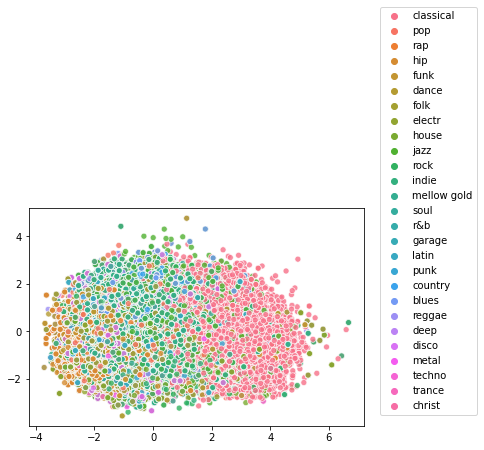

In [0]:
i = 100000
sns.scatterplot(X[:i,0], X[:i,1], hue=y[:i], alpha=0.8)
plt.legend(loc=(1.05, 0.05))